In [ ]:
from google.colab import files
import pandas as pd

# Upload dataset
uploaded = files.upload()

# Load dataset
df = pd.read_csv("Mall_Customers.csv")

print("Initial Shape:", df.shape)
print("\nMissing Values:\n", df.isnull().sum())

# Data Cleaning
df = df.drop_duplicates()

# Select relevant features for clustering
X = df[['Annual Income (k$)', 'Spending Score (1-100)']]

print("\nFinal Shape for clustering:", X.shape)
X.head()


Saving Mall_Customers.csv to Mall_Customers.csv
Initial Shape: (200, 5)

Missing Values:
 CustomerID                0
Genre                     0
Age                       0
Annual Income (k$)        0
Spending Score (1-100)    0
dtype: int64

Final Shape for clustering: (200, 2)


,Annual Income (k$),Spending Score (1-100)
0,15,39
1,15,81
2,16,6
3,16,77
4,17,40


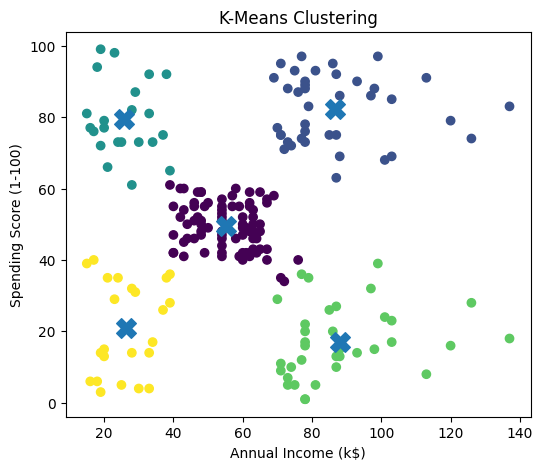

In [ ]:
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

# K-Means model
kmeans = KMeans(n_clusters=5, random_state=42)
kmeans.fit(X)

# Cluster labels
labels_kmeans = kmeans.labels_

# Plot clusters
plt.figure(figsize=(6,5))
plt.scatter(
    X.iloc[:, 0],
    X.iloc[:, 1],
    c=labels_kmeans
)
plt.scatter(
    kmeans.cluster_centers_[:, 0],
    kmeans.cluster_centers_[:, 1],
    marker='X',
    s=200
)
plt.xlabel("Annual Income (k$)")
plt.ylabel("Spending Score (1-100)")
plt.title("K-Means Clustering")
plt.show()


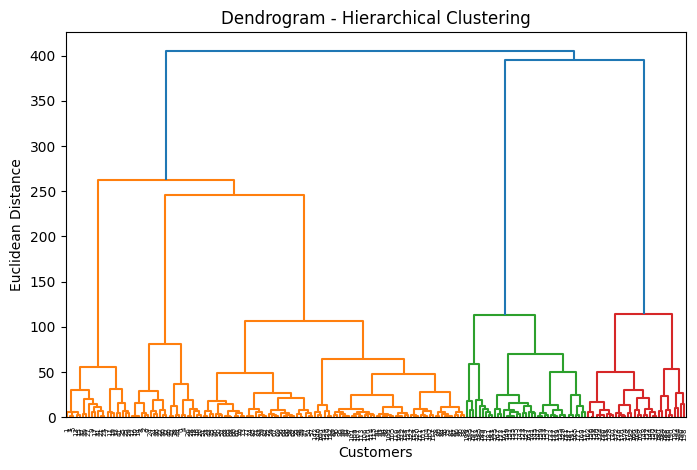

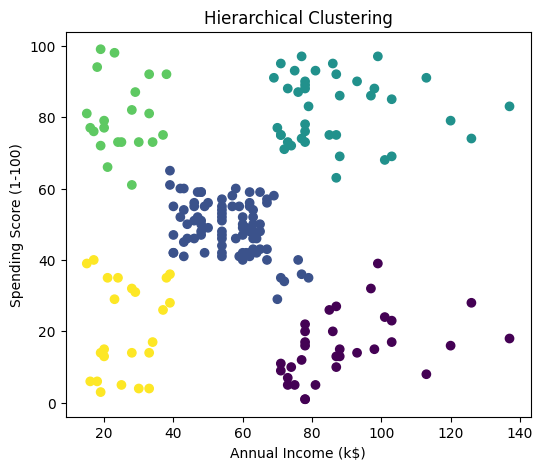

In [ ]:
from scipy.cluster.hierarchy import dendrogram, linkage
from sklearn.cluster import AgglomerativeClustering

# Dendrogram
linked = linkage(X, method='ward')

plt.figure(figsize=(8,5))
dendrogram(linked)
plt.title("Dendrogram - Hierarchical Clustering")
plt.xlabel("Customers")
plt.ylabel("Euclidean Distance")
plt.show()

# Agglomerative Clustering
hc = AgglomerativeClustering(n_clusters=5)
labels_hc = hc.fit_predict(X)

# Plot clusters
plt.figure(figsize=(6,5))
plt.scatter(
    X.iloc[:, 0],
    X.iloc[:, 1],
    c=labels_hc
)
plt.xlabel("Annual Income (k$)")
plt.ylabel("Spending Score (1-100)")
plt.title("Hierarchical Clustering")
plt.show()
